##Arboles de decision
Info de momento de inscripcion del estudiante y rendimiento de estudiantes al final de primer y segundo semestre.

In [40]:
#Esto es copy paste del git que uci ml repo

In [41]:
#!pip3 install -U ucimlrepo

In [42]:
from ucimlrepo import fetch_ucirepo, list_available_datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [44]:
# Cargo el dataset
dropout = fetch_ucirepo(id=697)
X = dropout.data.features
#2. Modificar la variable target, para clasificar si se graduar´a al finalizar el curso (clasificaci´on binaria).
y = dropout.data.targets.replace({'Graduate': 1, 'Dropout': 0, 'Enrolled': 0}).astype(int)
####Esto de arriba no estoy seguro si levantarlo como agrupar enrolled y dropout como no terminaron y graduados como target
####O si agarrar y eliminar enrolled completo.
#data.head()
X.head()
y.head()
print(y.value_counts())
#data.head()

Target
0         2215
1         2209
Name: count, dtype: int64


/tmp/ipython-input-593456297.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = dropout.data.targets.replace({'Graduate': 1, 'Dropout': 0, 'Enrolled': 0}).astype(int)


In [59]:
X.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


###3. Catalogar cada predictor (feature) en ordinales y nominales. Codificar las variables nominales como
###One-Hot.

In [45]:
nominales = [
    'Marital Status','Course','Daytime/evening attendance','Nacionality',"Mother's occupation","Father's occupation",
    'Gender','Displaced','Educational special needs','Debtor','Tuition fees up to date','Scholarship holder','International',
    'Application mode','Previous qualification',"Mother's qualification","Father's qualification"
]
ordinales = ['Application order','Previous qualification (grade)', 'Admission grade', 'Age at enrollment','Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)','Curricular units 2nd sem (without evaluations)','Unemployment rate','Inflation rate','GDP'
]




In [58]:
# One-hot a las nominales
encoder = OneHotEncoder(sparse_output=False, drop='if_binary')
X_nom = pd.DataFrame(encoder.fit_transform(X[nominales]),
                     columns=encoder.get_feature_names_out(nominales))
X_final = pd.concat([X[ordinales].reset_index(drop=True), X_nom], axis=1) # Levanto de nuevo el dataframe pero con las tf
#Hago el split.
#4. Utilice el comando train_test_split (sklearn) para definir dos conjuntos con las proporciones
#75 % y 25 %.
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.25, stratify=y,random_state=42
) #Es aleatorio pero el stratify intenta dejar una proporcion similar (ms edge copilot)
###Cosas de debugging para mi.
print(X_final.shape)
print(y.shape) #ok 4424 153, 4424,1.


(4424, 247)
(4424, 1)


##(b) Arbol de decision:
 Utilizando el comando tree.DecisionTreeClassifier (sklearn), entrenar un arbol de clasificacion
maximal con entropıa como funcion de impureza. Mencionar la condicion de la raız y los primeros
nodos.

Se entrena un árbol de decisión con entropía como medida de impureza.
El modelo divide el espacio de entrada buscando la máxima ganancia de información en cada nodo, sin limitar su profundidad.
Cada división selecciona el feature que más reduce la impureza entre las clases.

El modelo se entrena por costo de entropia, para cada uno de los pasos el algoritmo calcula todas las ganancias de informacion segun cada una de las features y luego compara con cada umbral para cada uno de los mejores. Este algoritmo se repite siempre buscando por el maximo para poder decidir una division sobre un nodo.
Despues, para cada nodo hijo se van calculando este mismo proceso para ver cual criterio va a dar la mejor ganancia de informacion. Para este primer caso sin podar, no se tiene encuenta el costo complejidad porque alpha es 0 (inicialmente).
Despues en la siguiente seccion cuando se suma el alpha el arbol puede decidir no ramificarse porque no gana informacion en un siguiente paso.

In [47]:
# Entreno arbol maximal (sin limitar profundidad)
tree_clf = DecisionTreeClassifier(criterion="entropy",random_state=42)
tree_clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [48]:
# índice del feature en la raíz
root_feature_idx = tree_clf.tree_.feature[0]
root_feature_name = X_train.columns[root_feature_idx]
root_threshold = tree_clf.tree_.threshold[0]
##Condicion de raiz
print(f"Nodo raíz → {root_feature_name} <= {root_threshold:.3f}")

#Nodos mas importantes (de arriba a abajo).
nodos = 5
for i in range(nodos):
    feat_idx = tree_clf.tree_.feature[i]
    if feat_idx != -2:  # -2 indica hoja
        print(f"Nodo {i}: {X_train.columns[feat_idx]} <= {tree_clf.tree_.threshold[i]:.3f}")
    else:
        print(f"Nodo {i}: Hoja (sin split)")


Nodo raíz → Curricular units 2nd sem (approved) <= 4.500
Nodo 0: Curricular units 2nd sem (approved) <= 4.500
Nodo 1: Curricular units 2nd sem (approved) <= 3.500
Nodo 2: Curricular units 1st sem (enrolled) <= 0.500
Nodo 3: Tuition fees up to date_1 <= 0.500
Nodo 4: Unemployment rate <= 15.850


2. Utilizando plot_tree (sklearn) graficar el diagrama de arbol. Indicar la cantidad de nodos y hojas.

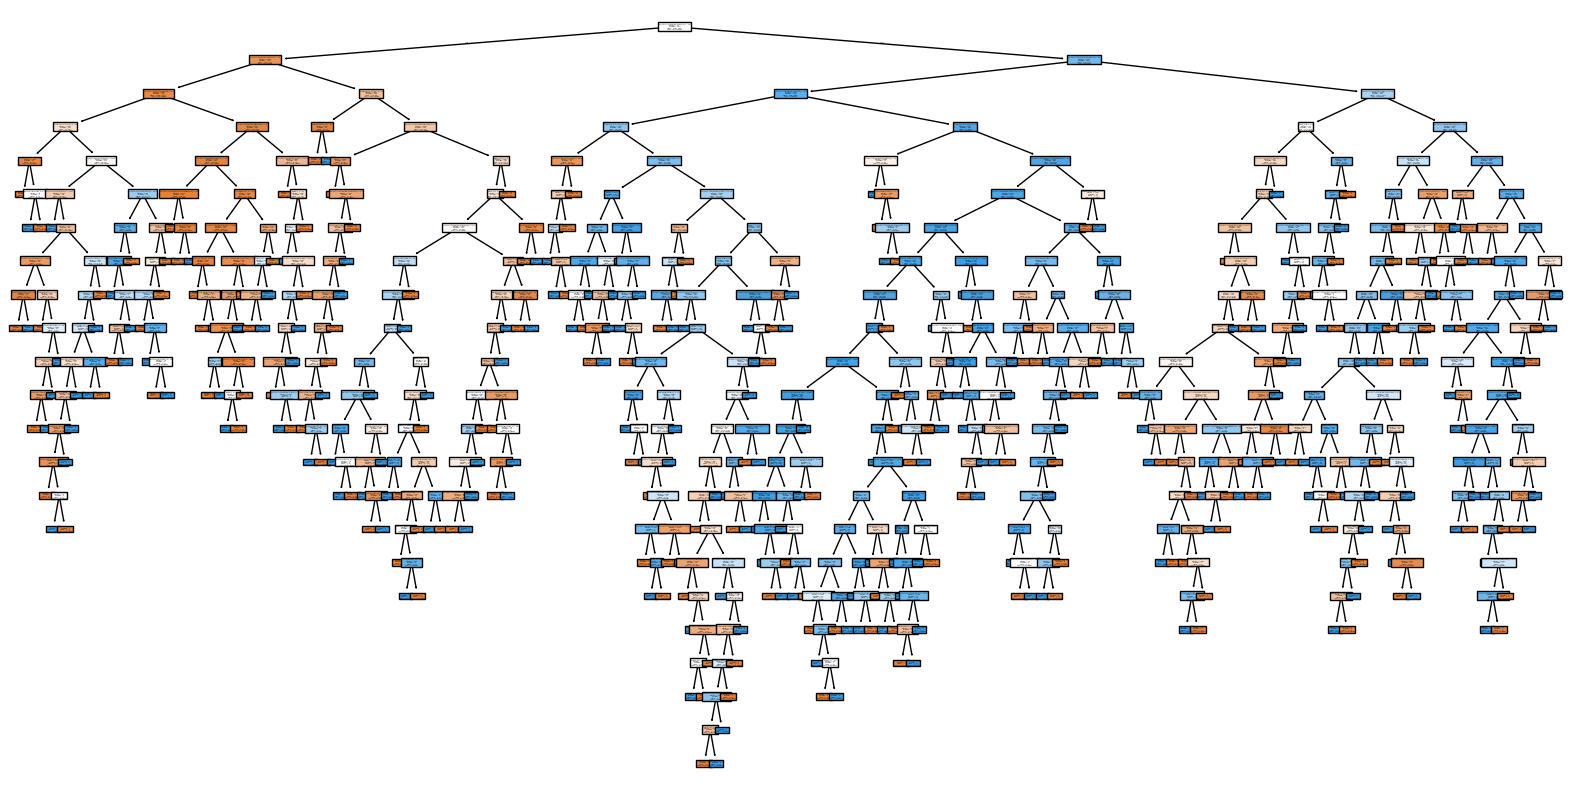

Nodos totales: 699
Hojas: 350


In [49]:
plt.figure(figsize=(20, 10))
plot_tree(
    tree_clf,
    feature_names=X_train.columns,
    class_names=['No graduado', 'Graduado'],
    #  max_depth=3,  # limito a los primeros niveles para que se entienda
    filled=True

  #  fontsize=8
)
plt.show()

# Cantidad de nodos y hojas
print(f"Nodos totales: {tree_clf.tree_.node_count}")
print(f"Hojas: {(tree_clf.tree_.children_left == -1).sum()}")


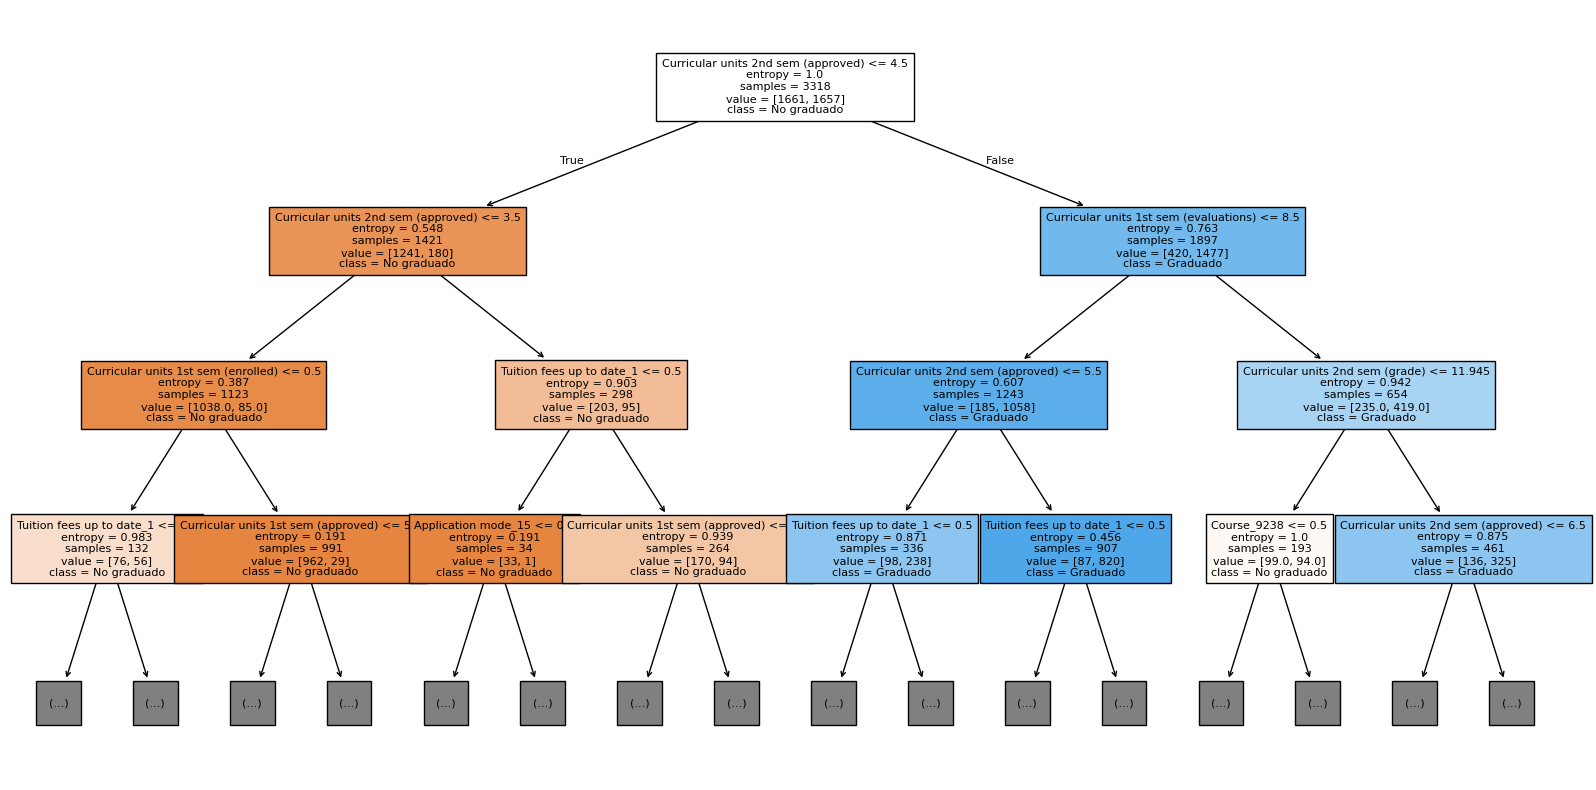

Nodos totales: 699
Hojas: 350


In [57]:
plt.figure(figsize=(20, 10))
plot_tree(
    tree_clf,
    feature_names=X_train.columns,
    class_names=['No graduado', 'Graduado'],
      max_depth=3,  # limito a los primeros niveles para que se entienda
    filled=True,
    fontsize=8
)
plt.show()

# Cantidad de nodos y hojas
print(f"Nodos totales: {tree_clf.tree_.node_count}")
print(f"Hojas: {(tree_clf.tree_.children_left == -1).sum()}")


Para estos parametros del arbol, puedo entrenar mi modelo para dejar todos los datos de train perfectamente encasillados. No tiene interpretabilidad y sobre ajusta a los datos. Tengo la mayor cantidad de nodos y hojas (partes finales del arbol sin impureza)

3. Indicar el accuracy y la F1, evaluados con los datos de testeo.

In [50]:
y_pred = tree_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) #Comparo aciertos y la f1.
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f" F1: {f1:.4f}")

Accuracy: 0.7812
 F1: 0.7835


4. Indicar los 2 features m´as relevantes seg´un la Feature Importance.

In [51]:
#DecisionTreeClassifier ya tiene adentro la importancia de cada una de las features que lo busco guardandolos y ordenando segun ese numero
importances = pd.Series(tree_clf.feature_importances_, index=X_train.columns)
top_features = importances.sort_values(ascending=False).head(2)
print("Features más relevantes:")
print(top_features)

Features más relevantes:
Curricular units 2nd sem (approved)    0.387331
Curricular units 1st sem (grade)       0.045670
dtype: float64


El árbol maximal logra una separación perfecta en entrenamiento, pero tiende al sobreajuste.
Tiene baja capacidad de generalización y alta varianza, aunque es el modelo más interpretativo al mostrar explícitamente las reglas de decisión (no comparado contra el podado, si no contra el bosque aleatorio que promedian o votan segun la prediccion de cada uno de los arboles del bosque).

#(c) Podado:

## Poda por Costo-Complejidad

La poda por costo-complejidad es una técnica utilizada para reducir el sobreajuste en los árboles de decisión.  
En el modelo maximal, el árbol tiende a dividir hasta que los nodos son completamente puros, lo que produce alta varianza y poca capacidad de generalización.  
La poda agrega una penalización al crecimiento del árbol para equilibrar sesgo y varianza.

La ecuacion que sigue alpha es la siguiente

$$
H_\alpha(T) = \sum_{m \in L(T)} \frac{|Q_m|}{n} H(Q_m) + \alpha |L(T)|
$$

donde el primer término mide el ajuste del árbol a los datos (error de clasificación),  
mientras que el segundo penaliza la complejidad del modelo.

- Cuando α = 0, no hay penalización y el árbol crece al máximo (árbol maximal).  
- A medida que α aumenta, el costo de mantener muchas hojas crece, y el árbol va eliminando divisiones con poca ganancia de información.  
- Para valores grandes de α, el árbol se simplifica hasta quedar en una sola hoja (modelo trivial).

El proceso se implementa con la función cost_complexity_pruning_path() de scikit-learn,  
que devuelve una secuencia ordenada de valores de α y los árboles asociados a cada uno.

En la siguiente imagen se ve el proceso intuitivo:
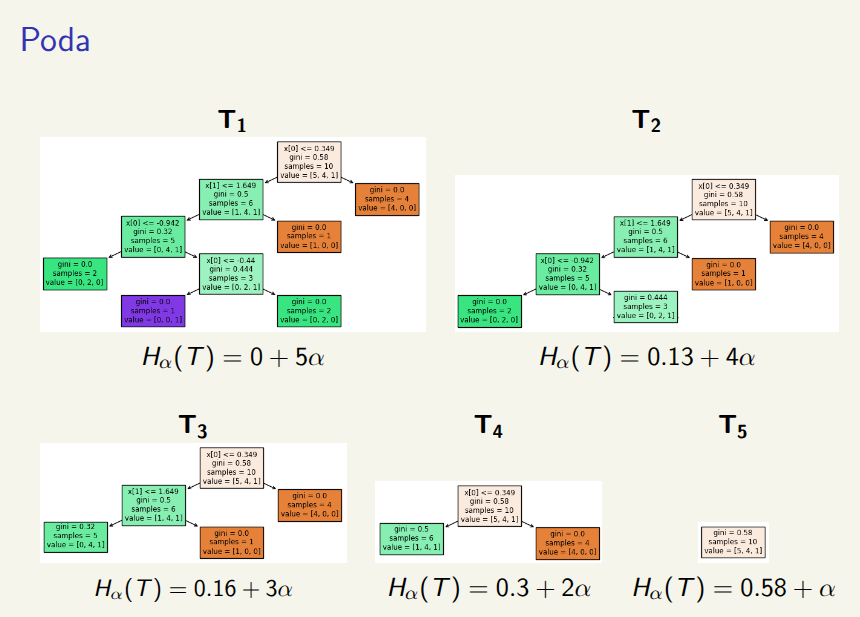

A partir del árbol maximal, se aplica poda por complejidad usando el parámetro α del método cost_complexity_pruning_path.
Este proceso penaliza la cantidad de hojas, eliminando ramas con baja ganancia de información para mejorar la generalización.


Cantidad de alphas: 202 (incluye el que deja al árbol en la raíz)


,alpha,leaves,nodes,accuracy,f1
0,0.000000,350,699,0.781193,0.783542
1,0.000588,348,695,0.781193,0.783542
2,0.000603,339,677,0.780289,0.782063
3,0.000603,339,677,0.780289,0.782063
4,0.000603,339,677,0.780289,0.782063


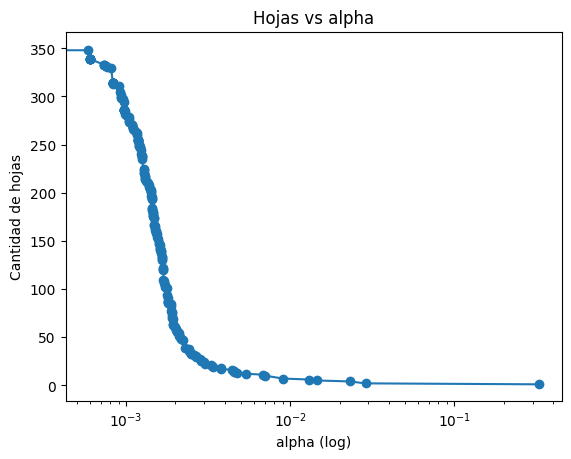

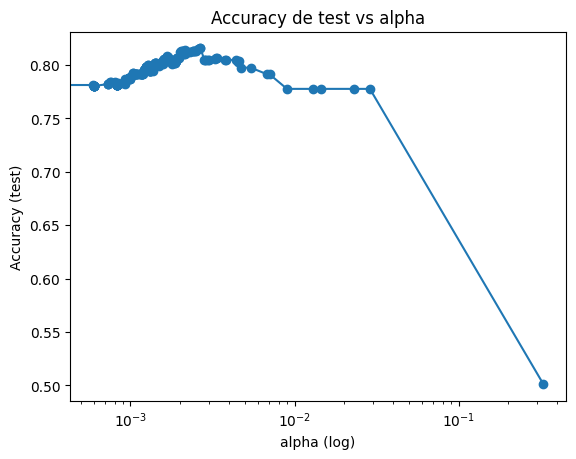

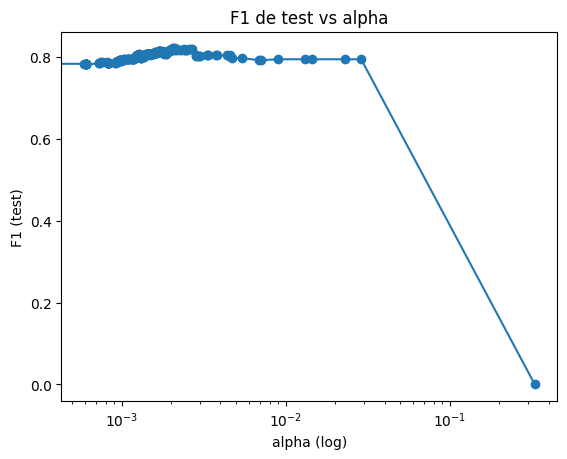

Mejor alpha por F1 (test): 0.00204099
F1(test) = 0.8214 | Accuracy(test) = 0.8128 | Hojas=56 | Nodos=111

Top-2 features por Feature Importance (árbol con mejor F1 de test):
Curricular units 2nd sem (approved)    0.632285
Curricular units 1st sem (enrolled)    0.061185
dtype: float64


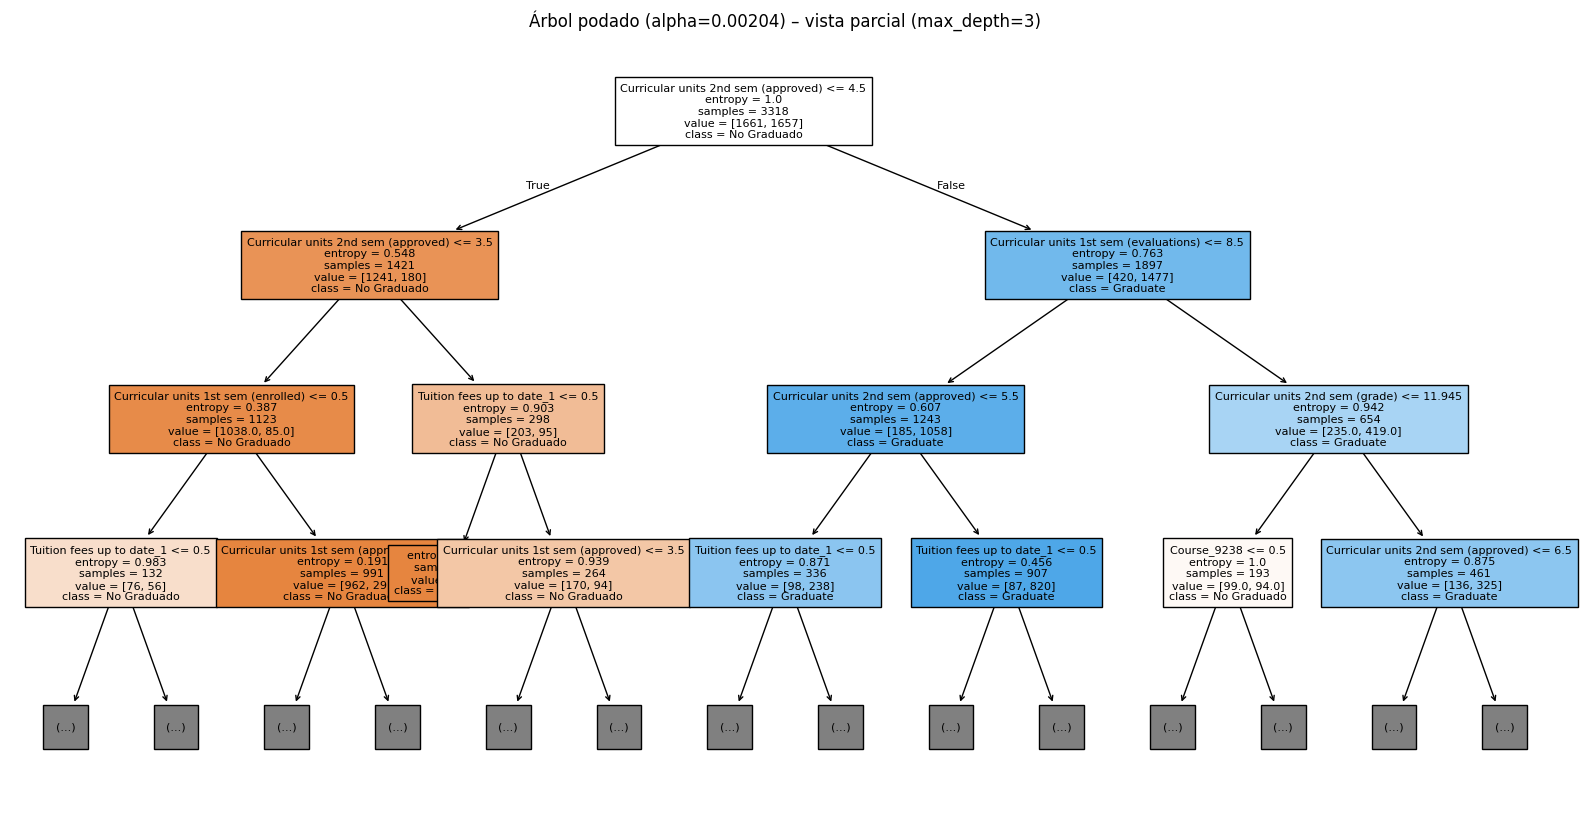

In [52]:
#1. Utilizando cost_complexity_pruning_path (sklearn), calcular todos los α relevantes para la poda
#de un ´arbol de decisi´on.
# Veo el arbol entero para ver por donde podar
base_clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
base_clf.fit(X_train, y_train)
path = base_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas      # alphas
impurities = path.impurities      #Guardo la impureza de cada una de las hojas
print(f"Cantidad de alphas: {len(ccp_alphas)} (incluye el que deja al árbol en la raíz)")
# 2. Repetir la implementaci´on del inciso (b) para un ´arbol podado para una complejidad α.
models = []
metrics = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion="entropy", random_state=42, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1  = f1_score(y_test, y_pred)
    leaves = (clf.tree_.children_left == -1).sum()
    nodes  = clf.tree_.node_count
    models.append(clf)
    metrics.append((alpha, leaves, nodes, acc, f1))

metrics_df = pd.DataFrame(metrics, columns=["alpha","leaves","nodes","accuracy","f1"])
display(metrics_df.head())

# 3. Graficar la cantidad de hojas en funci´on de α.
plt.figure()
plt.plot(metrics_df["alpha"], metrics_df["leaves"], marker='o')
plt.xscale('log')
plt.xlabel("alpha (log)")
plt.ylabel("Cantidad de hojas")
plt.title("Hojas vs alpha")
plt.show()

# Graficar el accuracy (evaluado con los datos de testeo) en funci´on de α
plt.figure()
plt.plot(metrics_df["alpha"], metrics_df["accuracy"], marker='o')
plt.xscale('log')
plt.xlabel("alpha (log)")
plt.ylabel("Accuracy (test)")
plt.title("Accuracy de test vs alpha")
plt.show()

#5. Graficar la F1 (evaluado con los datos de testeo) en funci´on de α.
plt.figure()
plt.plot(metrics_df["alpha"], metrics_df["f1"], marker='o')
plt.xscale('log')
plt.xlabel("alpha (log)")
plt.ylabel("F1 (test)")
plt.title("F1 de test vs alpha")
plt.show()

# Elijo el alpha que mejor testeo me deje.
best_idx = metrics_df["f1"].idxmax()
best_alpha = metrics_df.loc[best_idx, "alpha"]
best_f1 = metrics_df.loc[best_idx, "f1"]
best_acc = metrics_df.loc[best_idx, "accuracy"]
best_leaves = metrics_df.loc[best_idx, "leaves"]
best_nodes = metrics_df.loc[best_idx, "nodes"]
best_model = models[best_idx]

print(f"Mejor alpha por F1 (test): {best_alpha:.6g}")
print(f"F1(test) = {best_f1:.4f} | Accuracy(test) = {best_acc:.4f} | Hojas={best_leaves} | Nodos={best_nodes}")

# 6. Indicar los 2 features m´as relevantes seg´un la Feature Importance para el ´arbol de mejor F1 de
#testeo.
importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
top2 = importances.sort_values(ascending=False).head(2)
print("\nTop-2 features por Feature Importance (árbol con mejor F1 de test):")
print(top2)
md = 3
# Arbol podado ganador.
plt.figure(figsize=(20, 10))
plot_tree(
    best_model,
    feature_names=X_train.columns,
    class_names=['No Graduado', 'Graduate'],
    filled=True,
    max_depth=md,  # limitar dibujo
    fontsize=8
)
plt.title(f"Árbol podado (alpha={best_alpha:.3g}) – vista parcial (max_depth={md})")
plt.show()


El arbol podado pierde algo de precisión en entrenamiento, pero mejora el F1 y el accuracy en test, siendo más compacto y estable frente a datos nuevos.

##Bosque aleatorio

Se entrena un Random Forest compuesto por 20 árboles.
Cada árbol se ajusta sobre un subconjunto bootstrap de los datos y un subconjunto aleatorio de features por nodo, aplicando el principio de bagging para reducir la varianza del modelo.
Estos muestrean sobre las features a utilizar para hacer la clasificacion con un tamano raiz de las features para cada uno de los arboles (segun la teorica). Tambien se entrenan con muestreo con reemplazo de los datos de entrenamiento. Esto hace que no tiendan a sobreajustar y generalizar mejor a nuevos datos.

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest (20 árboles)
Accuracy : 0.8210
F1: 0.8235

 Features más relevantes:
Curricular units 2nd sem (approved)    0.148602
Curricular units 1st sem (approved)    0.086217
dtype: float64


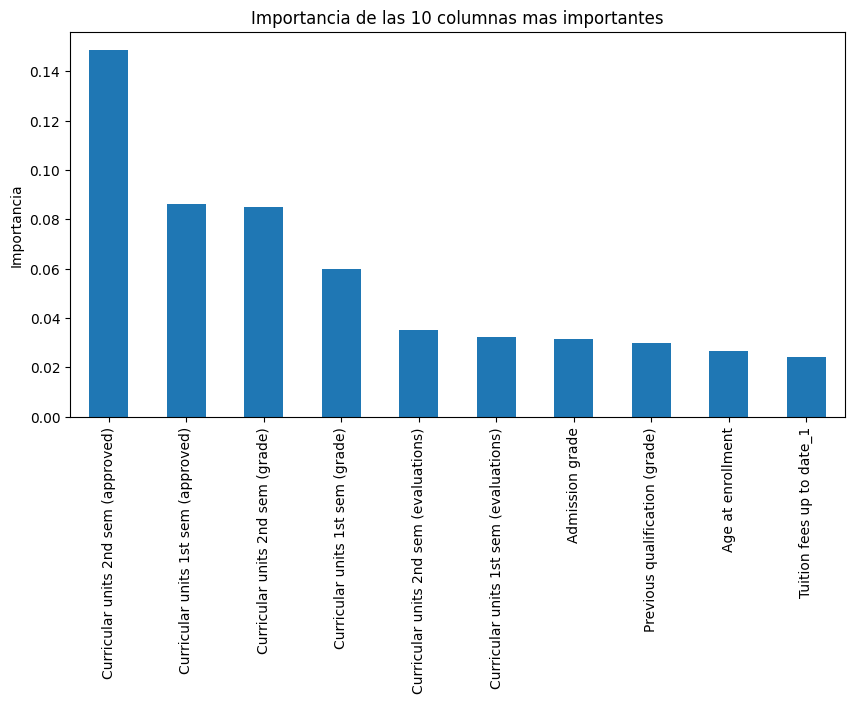

In [53]:
# Utilizando el comando RandomForestClassifier (sklearn), entrenar un clasificador de 20 ´arboles.
# Entrenar el bosque
rf_clf = RandomForestClassifier(
    n_estimators=20,
    criterion="entropy",
    random_state=42#Para comparar con Gabi
)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

#.Metricas
print(f"Random Forest (20 árboles)")
print(f"Accuracy : {acc_rf:.4f}")
print(f"F1: {f1_rf:.4f}")

#3. Indicar los 2 features m´as relevantes seg´un la Feature Importance.
importances = pd.Series(rf_clf.feature_importances_, index=X_train.columns)
top_features = importances.sort_values(ascending=False).head(2)
print("\n Features más relevantes:")
print(top_features)

# Importancia de las 10 columnas mas importantes
plt.figure(figsize=(10, 5))
importances.sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("Importancia de las 10 columnas mas importantes")
plt.ylabel("Importancia")
plt.show()


El bosque aleatorio combina la robustez de muchos árboles individuales, disminuyendo el riesgo de sobreajuste.
Suele ofrecer el mayor rendimiento global (F1 y accuracy), a costa de menor interpretabilidad, ya que el modelo final es un ensamble de cada uno. El bosque vota por la prediccion mas comun y es la prediccion que termina dando el modelo combinado

##Comparo los 3 modelos

Comparación de modelos:


,Modelo,Accuracy,F1
0,Árbol maximal,0.781193,0.783542
1,Árbol podado (α=0.00204),0.812839,0.821398
2,Bosque aleatorio (20),0.820976,0.823529


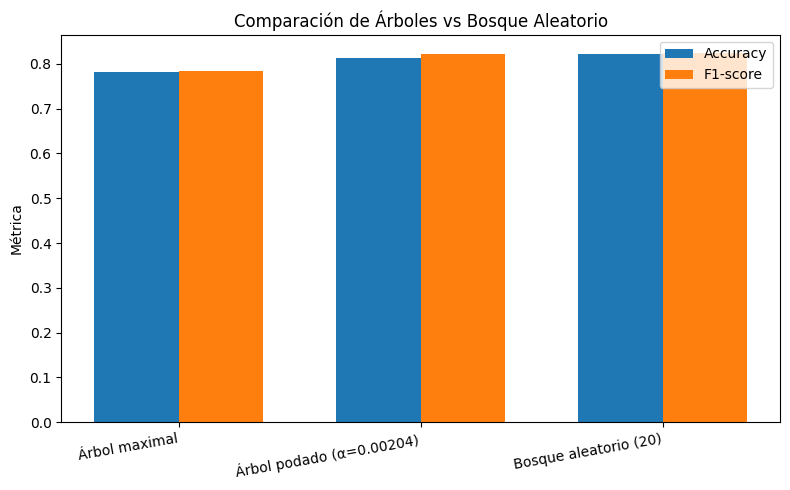

In [54]:
#Comparacion de los 3
y_pred_tree = tree_clf.predict(X_test)
y_pred_pruned = best_model.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)

results = pd.DataFrame({
    "Modelo": ["Árbol maximal", f"Árbol podado (α={best_alpha:.3g})", "Bosque aleatorio (20)"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_tree),
        accuracy_score(y_test, y_pred_pruned),
        accuracy_score(y_test, y_pred_rf)
    ],
    "F1": [
        f1_score(y_test, y_pred_tree),
        f1_score(y_test, y_pred_pruned),
        f1_score(y_test, y_pred_rf)
    ]
})

print("Comparación de modelos:")
display(results)

# Gráfico comparativo
plt.figure(figsize=(8, 5))
x = np.arange(len(results))
width = 0.35

plt.bar(x - width/2, results["Accuracy"], width, label="Accuracy")
plt.bar(x + width/2, results["F1"], width, label="F1-score")

plt.xticks(x, results["Modelo"], rotation=10, ha='right')
plt.ylabel("Métrica")
plt.title("Comparación de Árboles vs Bosque Aleatorio")
plt.legend()
plt.tight_layout()
plt.show()


El árbol maximal presenta sobreajuste por su alta flexibilidad.El árbol podado mejora la generalización al aplicar penalización por complejidad.
El bosque aleatorio logra el mejor equilibrio entre sesgo y varianza, reduciendo fuertemente la varianza mediante el promedio de modelos independientes. Pero entre los ultimos dos metodos los resultados son muy parecidos. La ventaja que tiene el ultimo de todos es la facilidad de su implementacion, ya que para el segundo es caro de implementar (cuando es una gran cantidad de datos hay que ir probando con un alpha y se vuelve lenta la ejecucion)